   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean

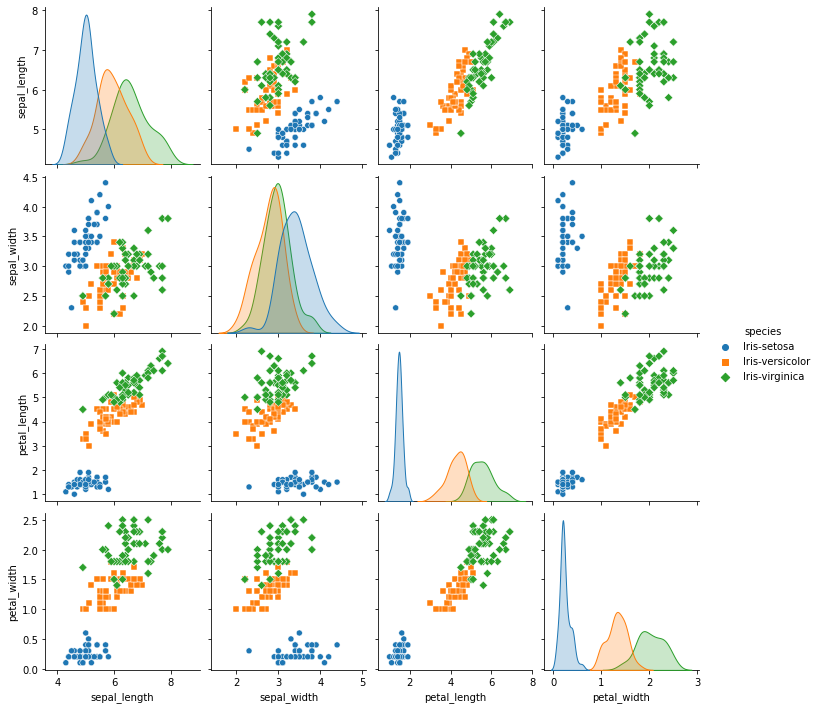

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Accuracy: 100.00%
The predicted species for the new data is: Iris-setosa


   sepal_length  sepal_width  petal_length  petal_width           Actual  \
0      0.310062    -0.495821      0.484037    -0.051440  Iris-versicolor   
1     -0.172257     1.925630     -1.268512    -1.266709      Iris-setosa   
2      2.239339    -0.980111      1.769240     1.433889   Iris-virginica   
3      0.189483    -0.253676      0.367201     0.353650  Iris-versicolor   
4      1.154121    -0.495821      0.542456     0.218620  Iris-versicolor   

         Predicted  
0  Iris-

C:\Users\Ankitha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


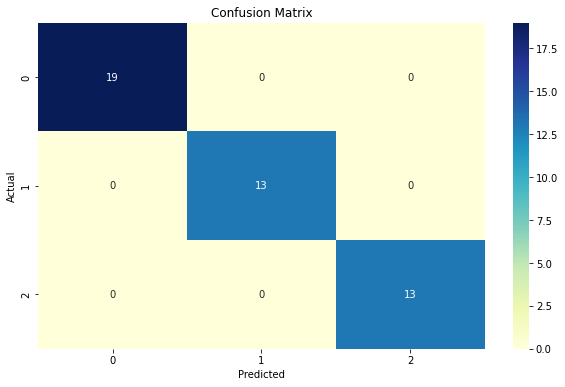

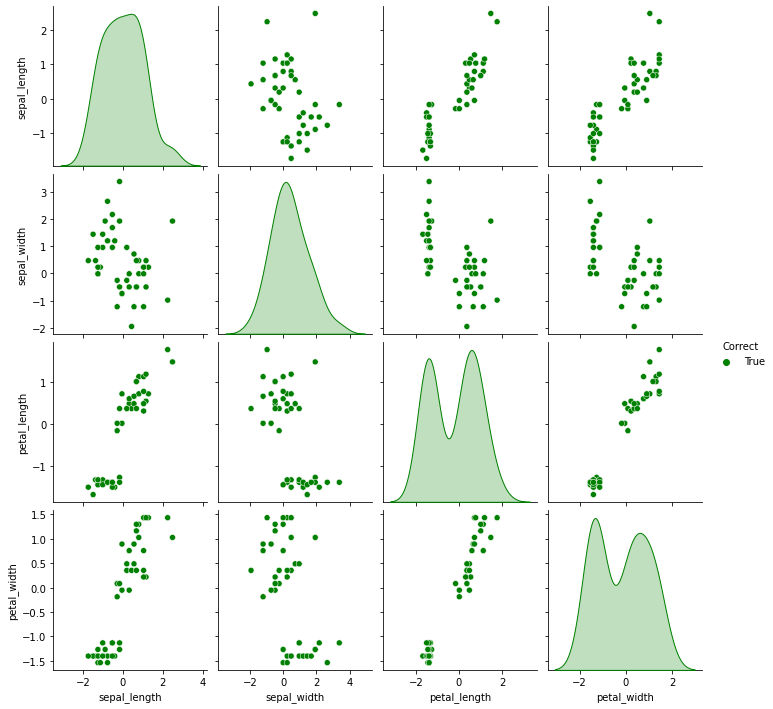

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

iris_data = pd.read_csv('IRIS.csv')

print(iris_data.head())
print(iris_data.info())
print(iris_data.describe())
print(iris_data['species'].value_counts())

sns.pairplot(iris_data, hue='species', markers=["o", "s", "D"])
plt.show()

X = iris_data.drop('species', axis=1)
y = iris_data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')

new_data = np.array([[5.1, 3.5, 1.4, 0.2]])
new_data = scaler.transform(new_data)
prediction = knn.predict(new_data)
print(f'The predicted species for the new data is: {prediction[0]}')
print('')
print('')

test_results = pd.DataFrame(X_test, columns=iris_data.columns[:-1])
test_results['Actual'] = y_test.values
test_results['Predicted'] = y_pred

print(test_results.head())

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

test_results['Correct'] = test_results['Actual'] == test_results['Predicted']
unique_correct_values = test_results['Correct'].unique()

if len(unique_correct_values) == 2:
    markers = ["o", "x"]
elif len(unique_correct_values) == 1:
    markers = ["o"]

sns.pairplot(test_results, hue='Correct', markers=markers, palette={True: "green", False: "red"})
plt.show()
